<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Bank-Marketing-Effectiveness-Prediction/blob/main/Kumar_Abhinav_Bank_Marketing_Effectiveness_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Bank Marketing Effectiveness Prediction**     



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**  Kumar Abhinav
##### **Team Member 2 -**  Saumya Dash



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kumarabhinavthakur274/Bank-Marketing-Effectiveness-Prediction

# **Problem Statement**


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [266]:
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math

# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})


### Dataset Loading

In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
df = pd.read_csv('/content/drive/MyDrive/DriveHub/bank-full.csv', sep=';')

### Dataset First View

In [269]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [270]:
# checking shape of dataset
df.shape

(45211, 17)

### Dataset Information

In [271]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [272]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())


0


There is no duplicate records in our dataset.

#### Missing Values/Null Values

In [273]:
# creating a list of categorical and continuous features
categorical_list = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

continuous_list = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

In [274]:
# Replacing Unknown entry in the dataset across the columns with np.nan
df = df.replace('unknown', np.nan)

In [275]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
poutcome,45211,36959,81.75
contact,45211,13020,28.80
education,45211,1857,4.11
job,45211,288,0.64
month,45211,0,0.00
previous,45211,0,0.00
pdays,45211,0,0.00
campaign,45211,0,0.00
duration,45211,0,0.00
age,45211,0,0.00


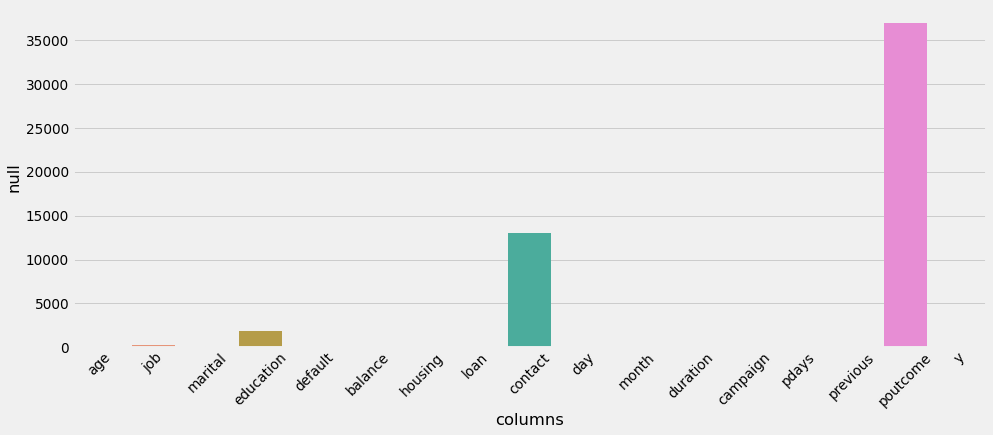

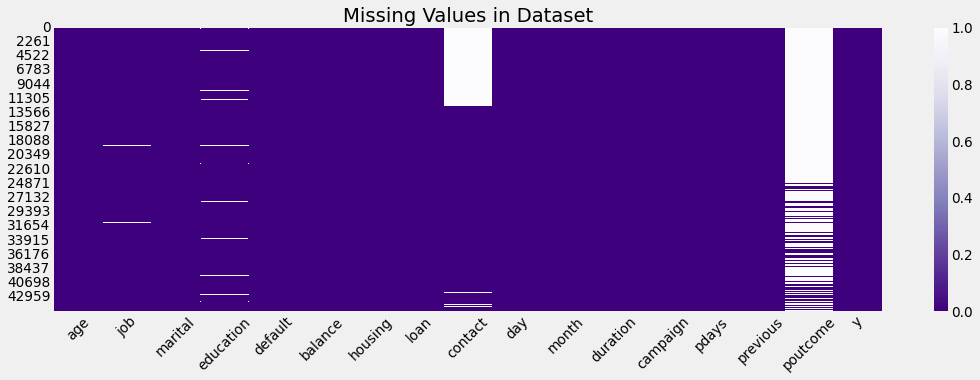

In [276]:
# Visualisation of null values 
null_df = df.isnull().sum().reset_index()
null_df.rename(columns = {'index':'columns', 0:'null'}, inplace = True)
sns.barplot(x = 'columns',
             y = 'null',
            data = null_df)
plt.xticks(rotation= 45)
plt.show()

plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap="Purples_r")
plt.xticks(rotation= 45)
plt.title('Missing Values in Dataset')
plt.show()


### What did you know about your dataset?

As per our intial overview of data we have following observation:


*   We have 45211 records and 17 columns in our dataset.
*   We have 10 categorical features with object dtype and 7 continuous features with either int and float dtypes.

*   We observed that few columns contained Unknown values which need to be treated, we replaced it with np.nan and then counted it.
*   We discoved that Education,Contact,poutcome contains null values.





## ***2. Understanding Your Variables***

In [277]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [278]:
# Dataset Describe
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Variable Description:

1. **_______ job _______**


*   This feature dipicts the type of jobs.
*   There 12 unique categories i.e 'management','technician', 'entrepreneur','blue-collar','unknown','retired','admin.','services','self-employed','unemployed','housemaid'and 'student'.
*   In this column we have 0.64% unknown values .



2.   **_______ marital _______**

*   This column represents the marital status of the potential customers.
*   It has 3 unique categories i.e 'married', 'single' and 'divorced'.
*   We discovered that majorty of custmers are married nearly 60% .


3.  **_______ education _______**


*  This column represents the educational qualification of the potential customers.  
* It has 3 unique categories i.e  'tertiary','secondary'and'primary'.
* We noticed that this column has 4.11% unknown values and majority of population qualified Secondry educated  (61%).

4.  **_______ Default _______**

* This column represents weather the customer has ctedit in default or not.
* It has two unique categories i.e either yes or no .
* we observed that 98% population does not have credit in default.

6.  **_______ housing _______**

* This columns dipicts wheater customer has a housing loan or not.
* It has two unique categories i.e yes or no .
* We observed evenly distributed data in this column .

7.  **_______ loan _______**
* This columns dipicts wheater customer has opted for any kind of loan or not.
* It has two unique categories i.e  yes or no .
* Majority of customers fall in 'no' category.

8.  **_______ contact _______**


*   This column dipicts the mode of establishment of communication between customers and the bank.
*   It has two unique values i.e cellular and telecom.
*  We observed 28.80% Unknown values in this column.
* Most of the customers have been contacted on cell phone.

9.  **_______ month _______**
* This column repsresents the month in which the customers were last contanted.
* Most customers were contacted in the month of may followed by july and august.

10.  **_______ poutcome _______**
* This columns suggests the outcome the last campaign.
* It has for categories i.e failure, others and Success.
* 81% of the data were found to be unknown.

11.  **_______ y (term deposit) _______**

* This is the target variable which suggests that wheater the customer went for term deposit or not.
* It has two fields that is yes or no.
* We observed that there is a class imbalance in the target variable which need to be treated before putting into the model.

11. **______age ______**
* It represents the age of the potential customers.
* We can see mean of the age is around 40 and median is also close to mean.

12. **_______ balance _______**
* It depicts the account balance.
* Here we can see a huge gap in mean and median.

13. **________ day ________**
* It depicts the day of the month (i.e. 1 to 31) on which the customer was last contacted.

14. **________ duration ________**
* It depicts the time duration for which the customer was last contacted. 
*Note* As per the given instruction it should be only included for benchmark purposes and ignored if the objective is a realistic predictive model.

15. **________ campaign ________**
* It represents how many times each prospective consumer was contacted as part of the current campaign.

16. **________ pdays ________**
* It represents the number of days passed by after the client was contacted from a previous campaign. 
* Most of the clients were not contacted at all which is represented by -1 in the dataset.

17. **________ previous ________**
* It is the number of contacts performed before this campaign














### Check Unique Values for each variable.

In [279]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [280]:
# Check Unique Values for each variable.
print("Unique values in these categorical features: \n")
for i in categorical_list:
  print(f'Unique values in {i}---------->>  {df[i].unique()}')

Unique values in these categorical features: 

Unique values in job---------->>  ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in marital---------->>  ['married' 'single' 'divorced']
Unique values in education---------->>  ['tertiary' 'secondary' nan 'primary']
Unique values in default---------->>  ['no' 'yes']
Unique values in housing---------->>  ['yes' 'no']
Unique values in loan---------->>  ['no' 'yes']
Unique values in contact---------->>  [nan 'cellular' 'telephone']
Unique values in month---------->>  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome---------->>  [nan 'failure' 'other' 'success']
Unique values in y---------->>  ['no' 'yes']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [281]:
# replacing null values in job , education , contact with mode in respective columns
null_list = ['job','education','contact']
for i in null_list:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [282]:
# replacing null or unknown values with the category 'other' 
df['poutcome'].fillna('other',inplace=True)

In [283]:
df['p_contacted'] = [0 if x == -1 else 1 for x in df.pdays]
df.drop(columns=['pdays'], inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,p_contacted
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,other,no,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,other,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,other,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,other,no,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,other,no,0


In [284]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
previous       0
poutcome       0
y              0
p_contacted    0
dtype: int64

### What all manipulations have you done and insights you found?

1. **Job**: There were 288 nan values in this column. So we substituted the same with the mode of the column i.e. "Blue Collar jobs" as it was a categorical variable.
2. **Education**: There were 1857 nan values in this column, we substituted it  with the mode i.e. "Secondary Education".
3. **Contact**: Since there are 13,020 nan values in this column and we are aware that cellular communication is currently the most preferred one, we made the assumption that the nan values might be replaced with cellular type values. And also the mode of the column is 'Cellular'.
4. **poutcome**: It contained 3 fields that is 'success', 'failure' and 'others'. Here we assumed that the unknown data points will fall under 'other' category, thus were filled with 'other'.
5. **pday**: We have mapped the non contacted values i.e -1 as 0 and all the other values as 1, where 1 represents that the client was contacted.Then we renamed the column to **p_contacted**.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [285]:
# Plotting distribution plot for various continuous variables
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= x[t],   
                     ax=ax)
        plt.title(t + '_distribution')

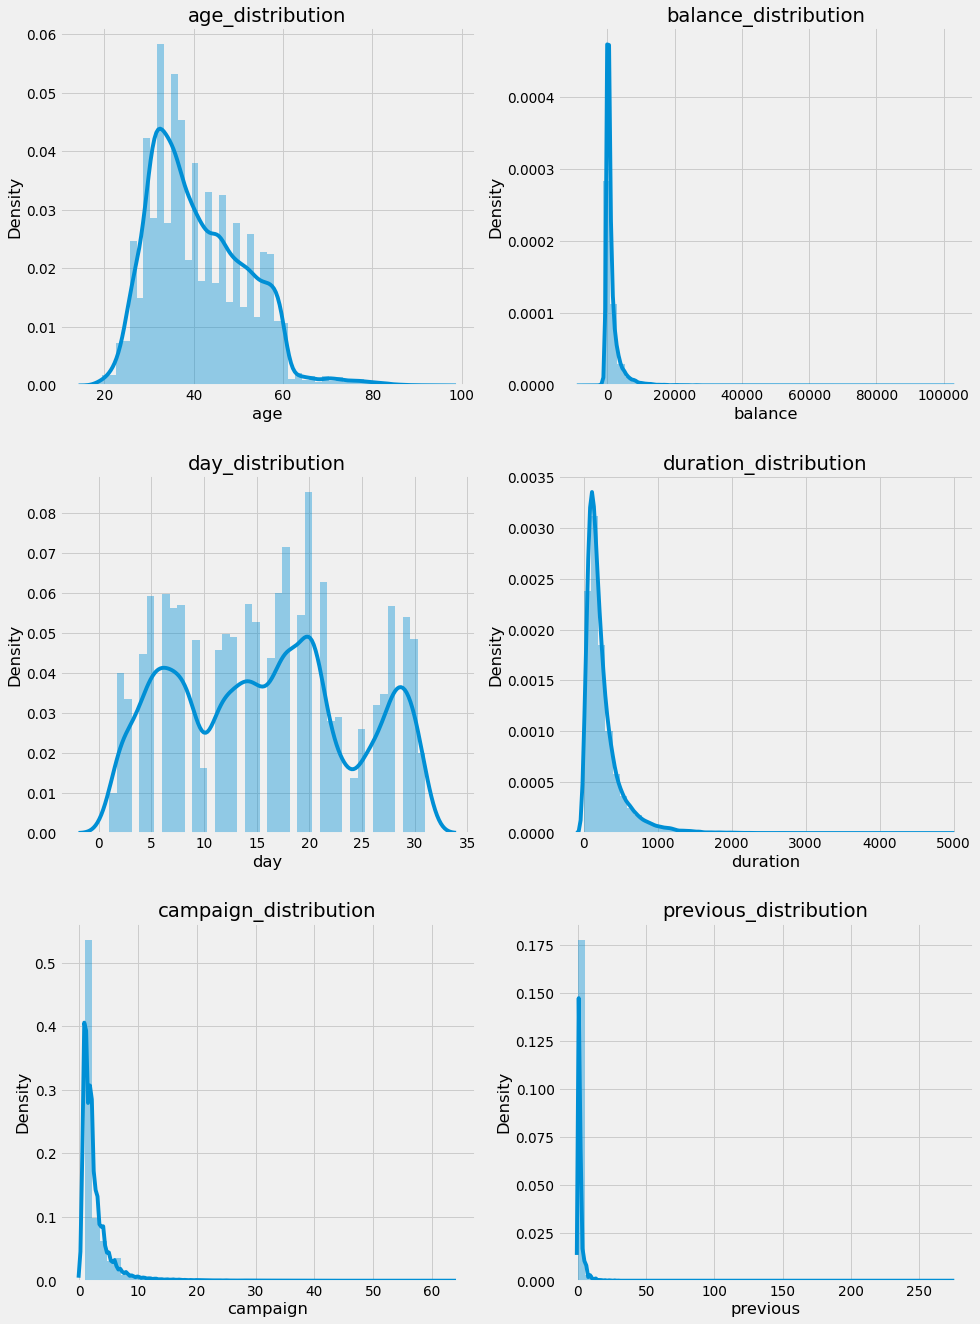

In [286]:
plot_cont(df[continuous_list])

**1. Why did you pick the specific chart?**

We are plotting the probability density function for the different continuous variables to check the spread of data.It provides the details of where the centeral tendencies lie and what is the variance of particular feature.

**2. What is/are the insight(s) found from the chart?**

These are the insights found from diffrent variables:

*   The population belongs to the age group below 60 that is working population is our target customers.
*   Majority of people earns less than $5000.

*   There is a huge bump at zero in both **previous** and **campaign** columns that means most of the customers were not contacted at all.







**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.** 

Ofcourse above insigts can be helpful in targeting our customers as per their age and salary . They may be a potential customer who may do term deposit in near future.
Since we saw that most of the customers were not contacted it means we are losing out on these potential customers because we are leaving them unattended.

#### Chart - 2

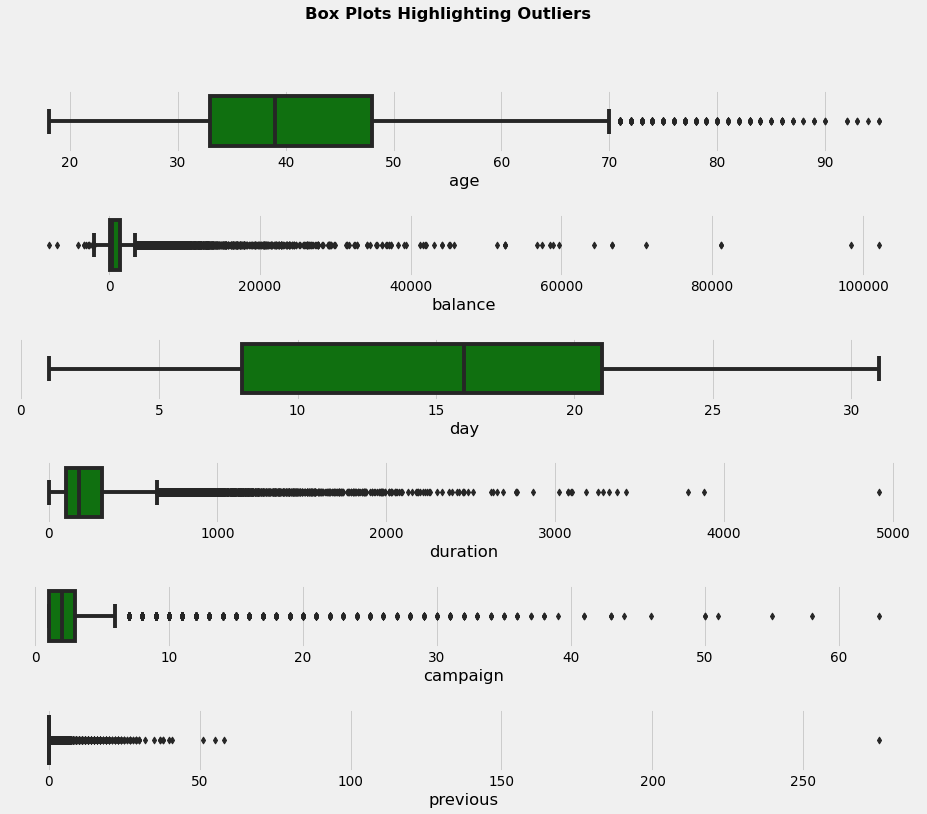

In [287]:
# plotting box plot for each continuous variable.
nrows = len(continuous_list)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(continuous_list):
    sns.boxplot(df[var], orient='h', ax=axes[i],color= 'g')

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

**1. Why did you pick the specific chart?**




We picked box plot to check for outliers in each continuous variable features.

**2. What is/are the insight(s) found from the chart?**

From the above plot we came up with the following insights:
* We can observe that there are a bunch of customers who were contacted more than 20 times on the other hand bulk of clints who were not contacted at all .
* Same is the case with duration of the call in the last contact where some customers were given ample amout of time while majority calls were of the shorter duration.
* The median clint age is close to 40 and there are not many clints who were more than 60. 

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason** 

Yes above insights can be helpful in identifying where the company is going wrong in terms of engaging with the customers. If right customers will be targeted with proper strategy it may proved to be in the favour of the comapany.

#### Chart - 3

In [288]:
relevent_list = ["y","default","housing","loan","contact"]

In [289]:
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        plt.pie(x[t].value_counts(), labels = ['Yes','No'], autopct='%1.0f%%', colors=['blue', 'orange'],startangle=45, shadow = True)
        plt.title(t + '_count')

        

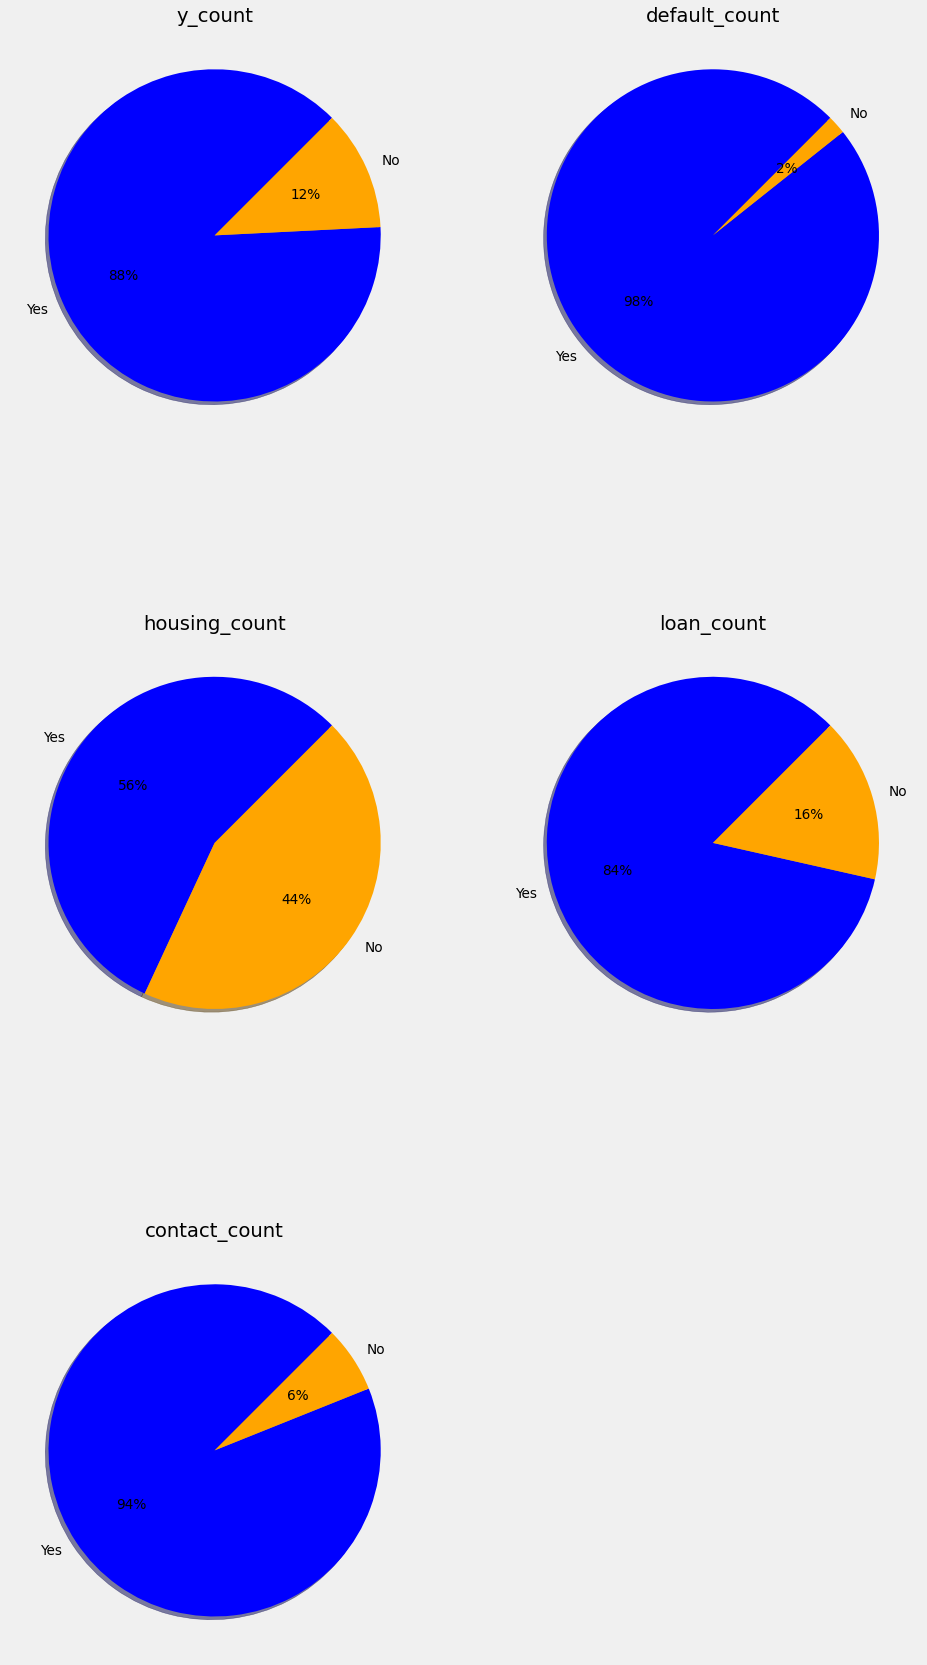

In [290]:
plot_cont(df[relevent_list])

**1. Why did you pick the specific chart?**

Since all the above featurs are of binary categories i.e it has two fields either yes or no we can know the percentage of occurance of these which may tell us some story.

**2. What is/are the insight(s) found from the chart?**

* Our target variable i.e y has majority of yes, this the clear of class imbalance.
* 98% of the population has credit in default.
* 56% has already opted for housing loan.
* 84% has opted for some kind of loan.
* 94% has not been contacted.

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.**

Yes Class imbalance can have ill impact on the accuracy of the classification model So it will be necessory for us to treat this problem before putting the data in training. Other imformation which are available to us through the pie chart can be helpful in categorizing the customers into groups and then make plans accordingly.

#### Chart - 4

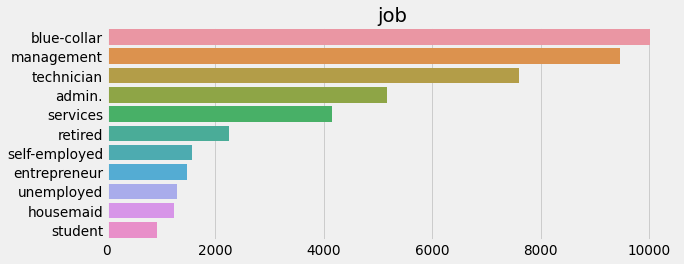

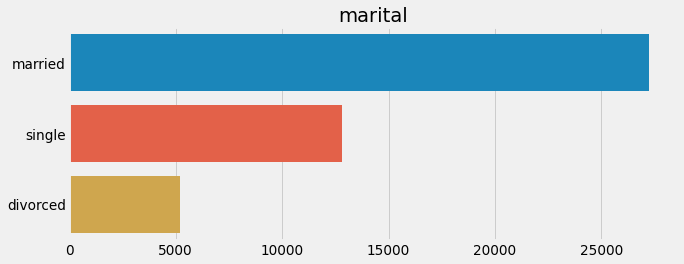

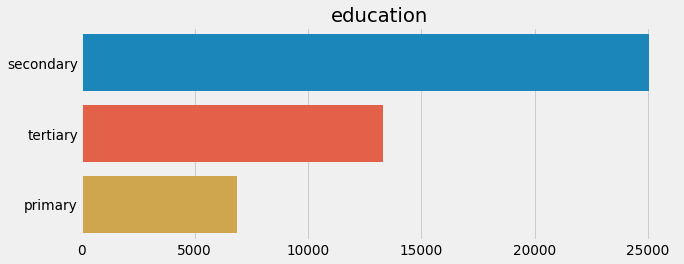

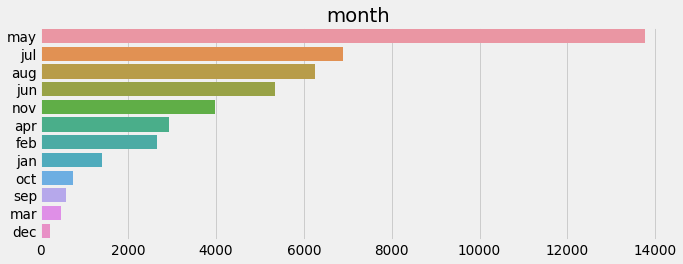

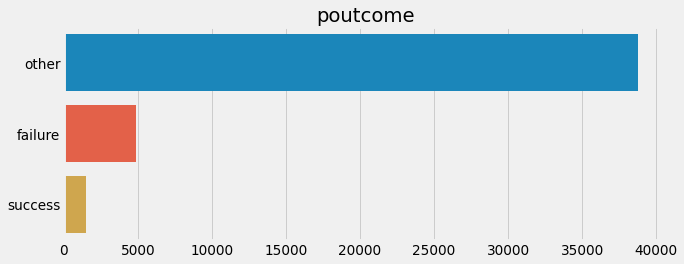

In [291]:
# Chart - 4 visualization code
relevent_list1 = ['job',
 'marital',
 'education',
 'month',
 'poutcome']
for col in relevent_list1:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

**1. Why did you pick the specific chart?**

All the features that we have taken in the above plots have more than two categories . So we chose column charts to know the number of outcomes in each categories .

**2. What is/are the insight(s) found from the chart?**

We can see that:
* The majority of targeted clients are employed in Blue Collar jobs followed by management and technician
* The majority of targeted clients  have only completed secondary education.
* Most of the potential clients are married.
* poutcome shows that 90% of the data belong to the category where the outcome of the last campaign is unkown.

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.** 

Above plots can be useful in categorzing the clints in terms their employment , education and marital status , which can be useful in making effective strategies to woo different groups.



#### Chart - 5

In [292]:
# Chart - 5 visualization code
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Term deposit in terms of {e}')
    plt.show()

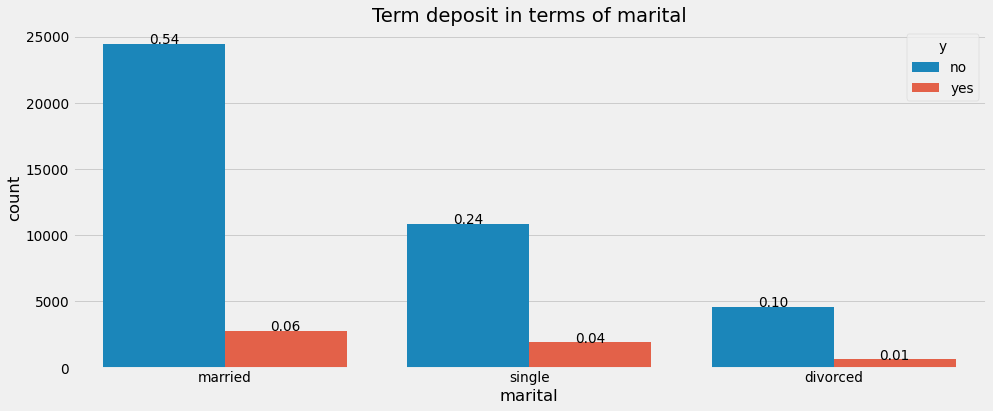

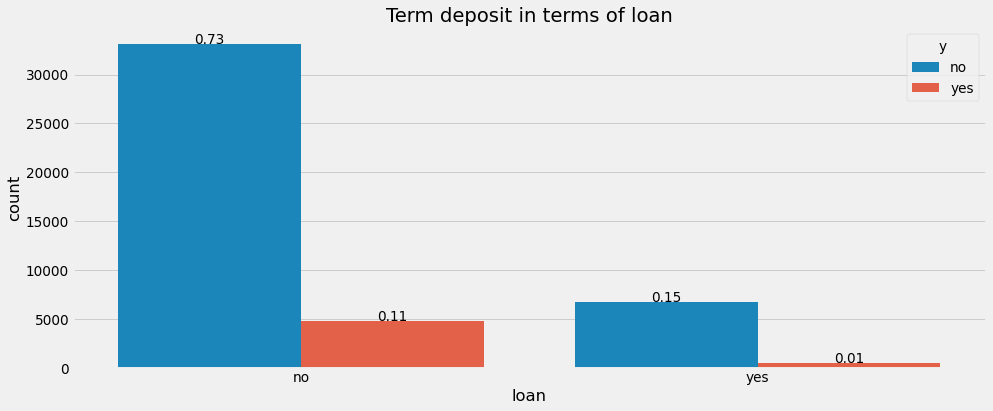

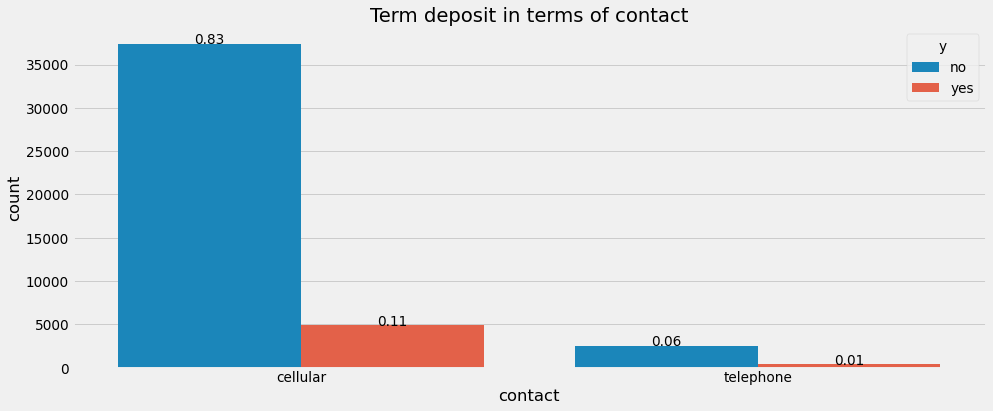

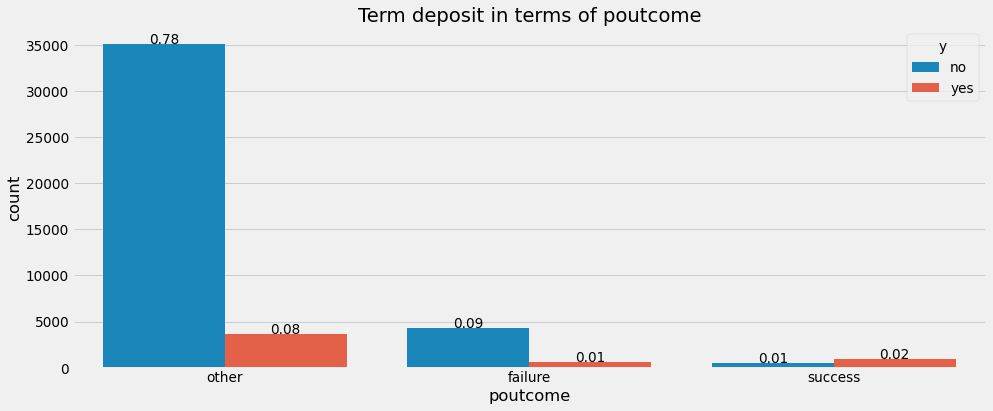

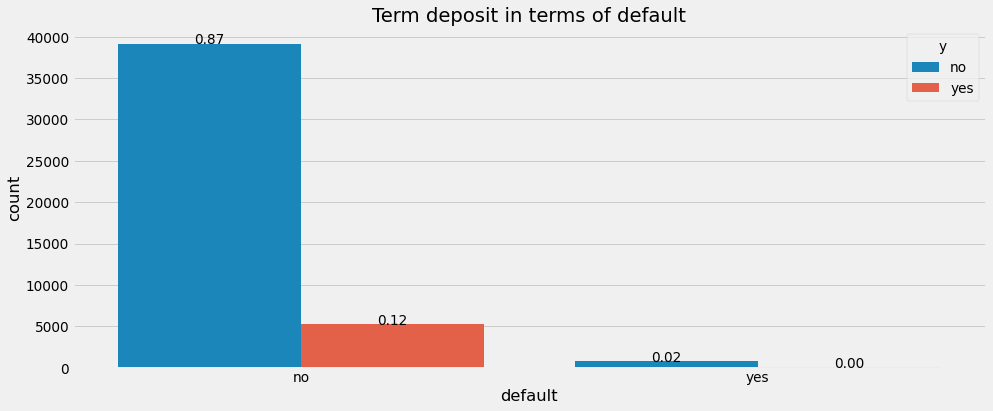

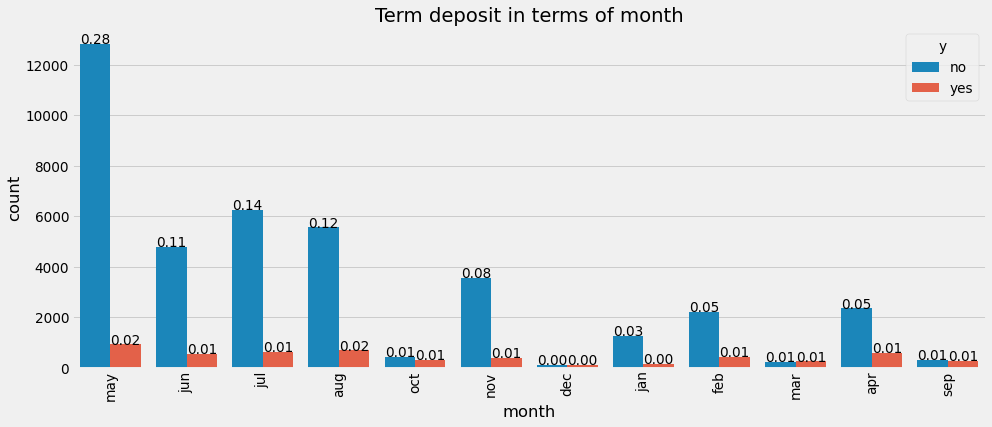

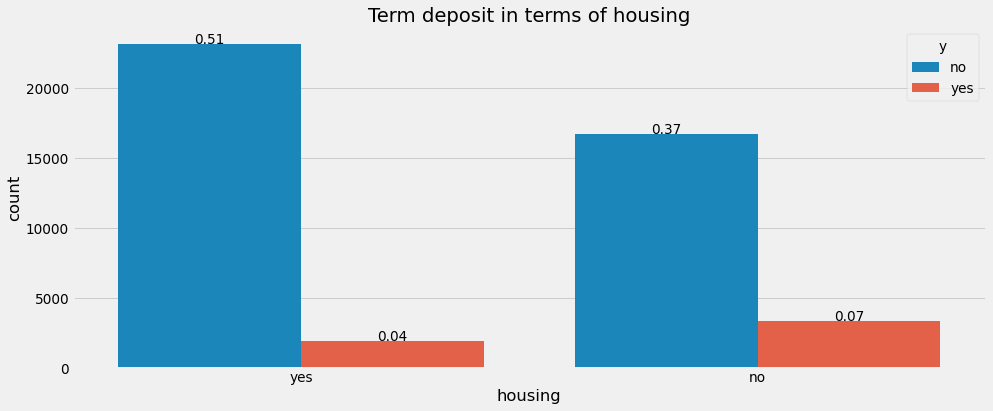

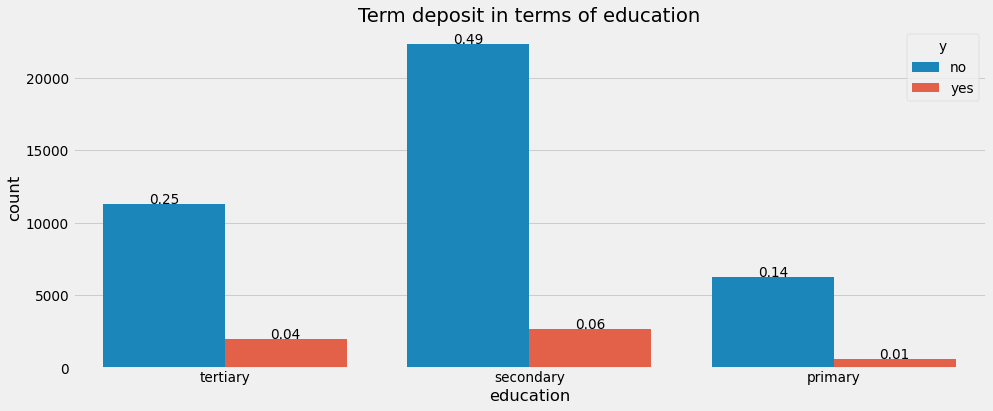

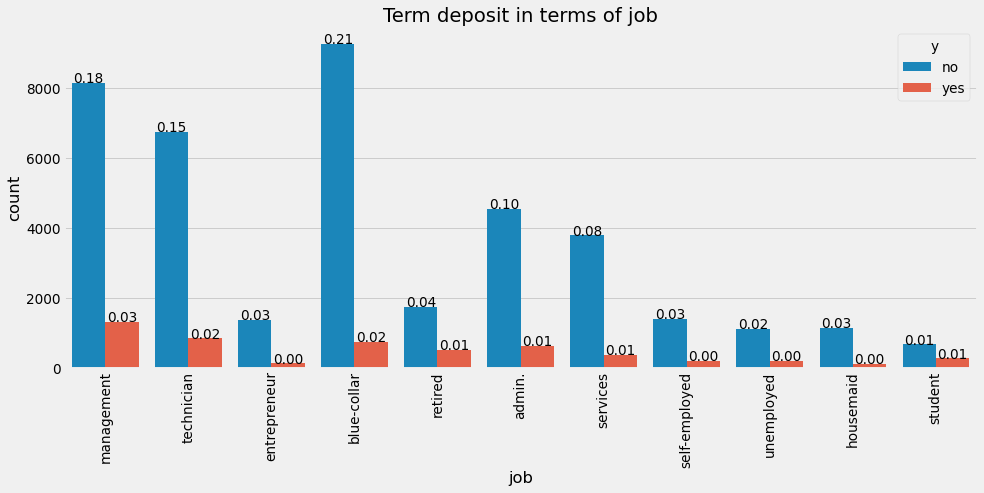

In [293]:
plot_cat_data(df,'y')

**1. Why did you pick the specific chart?**





We have used bar charts to count the values of clients who have opted for term deposit and those who have not opted for it.

**2. What is/are the insight(s) found from the chart?**

On the basis of the above bar charts we came up with these insights:

* It is clear that only those who have previously not defaulted on their credit have chosen to use term deposits, in contrast to those who defaulted on their credit.
* May is the month when most term deposits are made.
* We can observe that the majority of married and single clients chose term deposits, while just 0.01 of the customers who were divorced did.
* Oct, mar and sep has a good ratio of acceptance/rejection
* It cannot be clearly said that the y(term deposit) is dependent on the success or failure of the previous campaign as 0.08 agreed to the term deposit whose poutcome were unknown.
* Majority of the people who have not opted for any personal loan have made a term deposit.

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 6

In [294]:
continuous_list

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

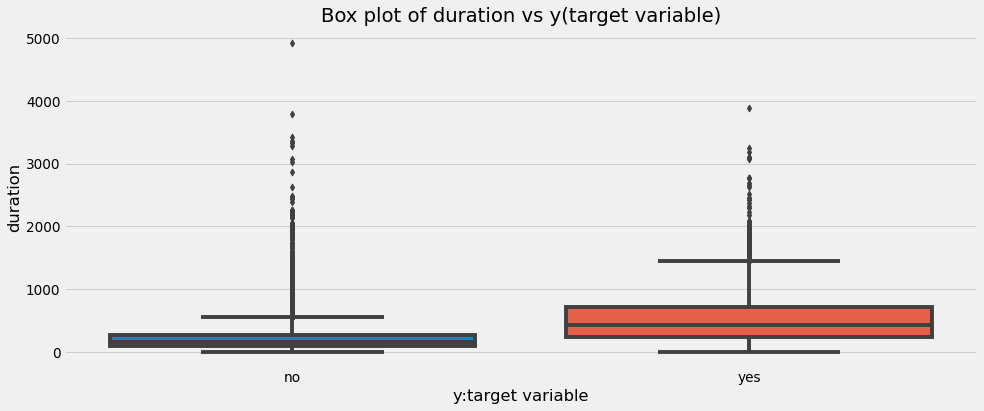

In [295]:
# Chart - 6 visualization code
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

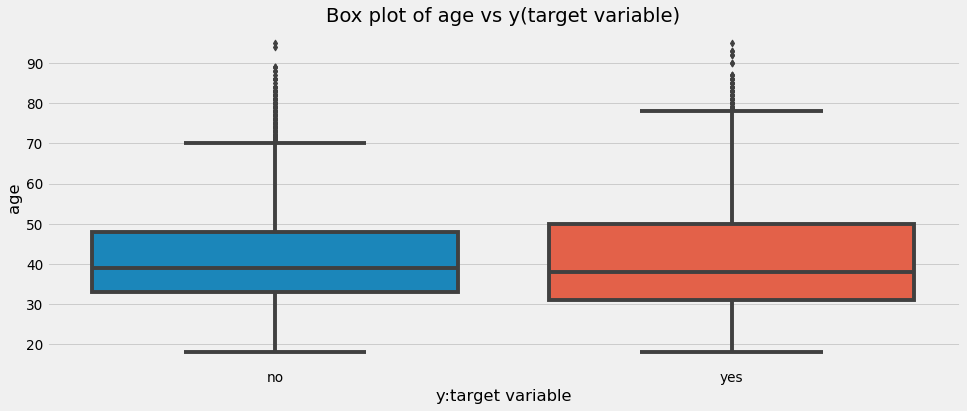

In [296]:
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

Text(0.5, 0, 'y:target variable')

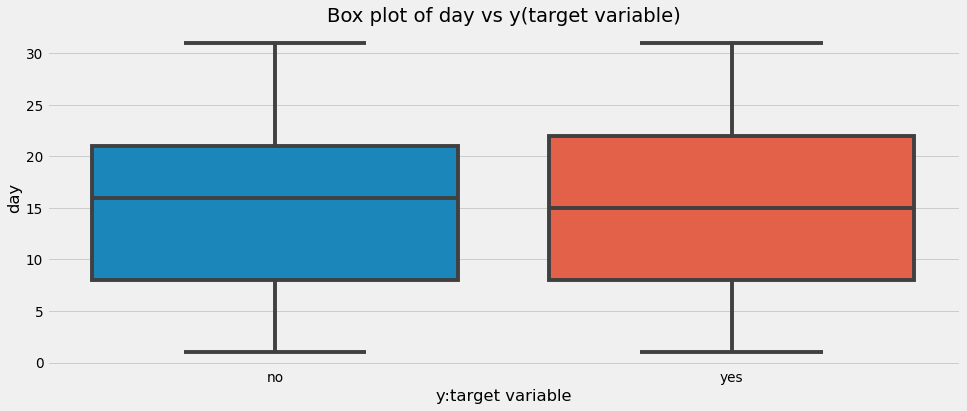

In [297]:
sns.boxplot(y=df['day'], x=df['y'])
plt.title('Box plot of day vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

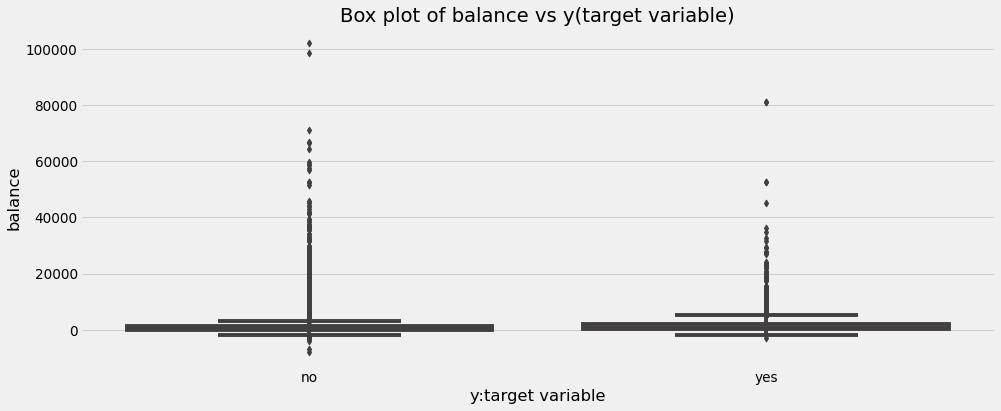

In [298]:
sns.boxplot(y=df['balance'], x=df['y'])
plt.title('Box plot of balance vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

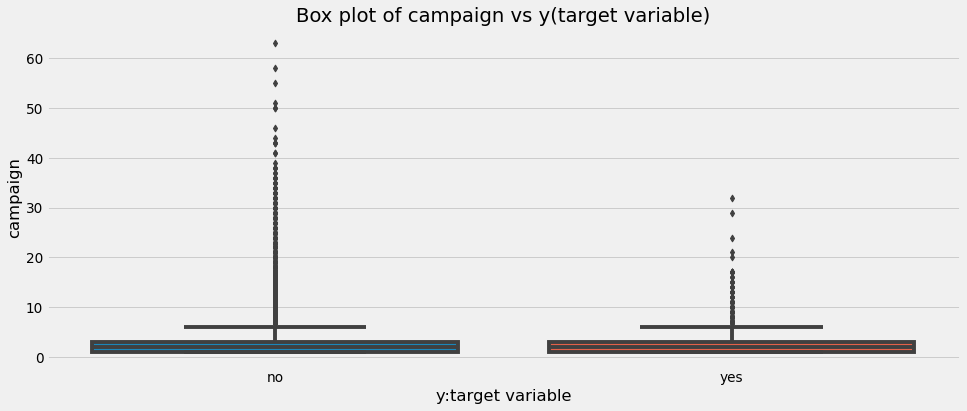

In [299]:
sns.boxplot(y=df['campaign'], x=df['y'])
plt.title('Box plot of campaign vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

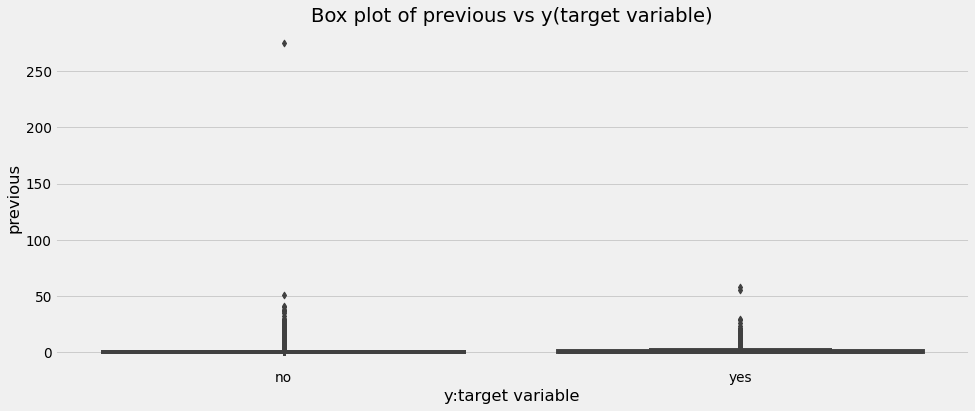

In [300]:
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

**1. Why did you pick the specific chart?**

To vizualize the spread of the continuous features across the target variable(yes or no), we used the box plots which clearly shows the median, quartiles and outliers accross the features

**2. What is/are the insight(s) found from the chart?**

Based on the bivariate analysis of continuous variable with target variable using box plot we came up with the following insights:
* The clints who are spending more time on the phone call has the more chances of conversion.
*Those who have contacted earlier has more chances to opt for term deposit.
*Balance campaign and previous are full of outliers which need to be treated.


#### Chart - 7

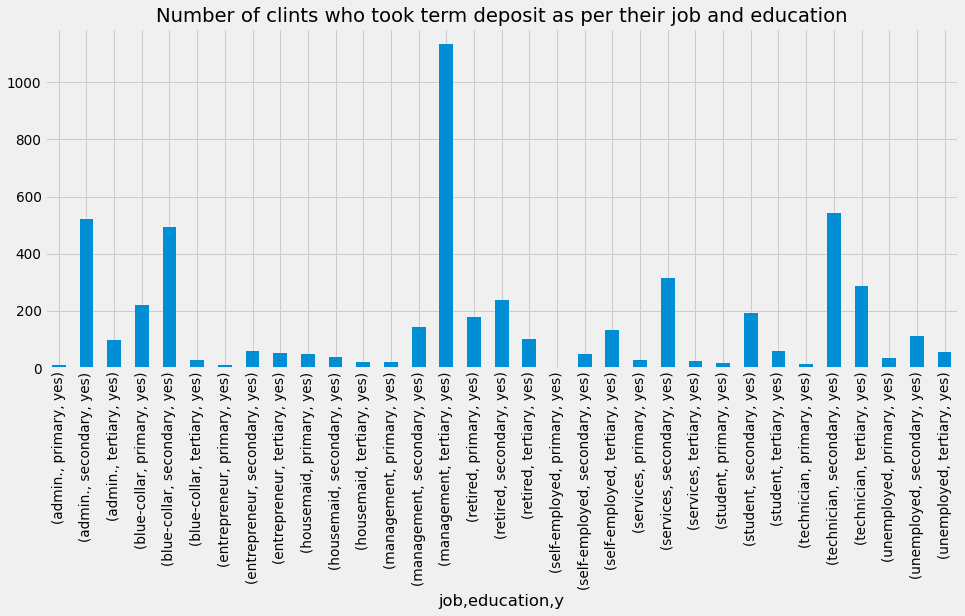

In [301]:
# Chart - 7 visualization code
df_yes = df[df.y=='yes']
df_yes.groupby(['job','education','y'])['y'].count().plot(kind="bar",title = 'Number of clints who took term deposit as per their job and education')


**1. Why did you pick the specific chart?**

Here, we used a Bar- Count Plot and visualised the number of clients who have made term deposits using a bar-count plot, grouping them based on their jobs and degree of education. We picked this particular graph since we were curious about the customer count

**2. What is/are the insight(s) found from the chart?**



* We can see that the most of clients who have management-related jobs and a tertiary degree have made the most term deposits.
* Also, customers with the secondary level of education are the most with term deposits

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.**

* Because they are less prevalent, strategies can be developed to engage clients who are unemployed and have only completed their primary education.
* Additionally, Company can devise strategies to engage socially disadvantaged clients, including housemaids and technicians, who seldom have any money left over for term deposits

#### Chart - 8

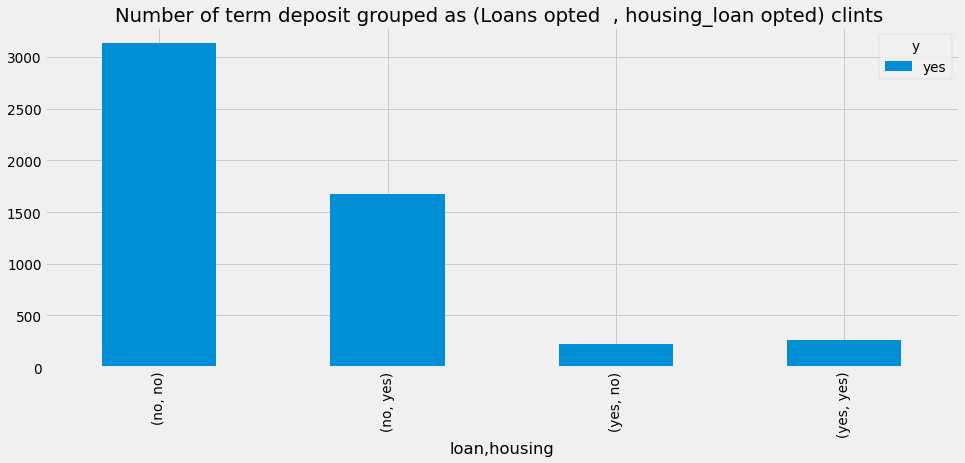

In [302]:
# Chart - 8 visualization code
df_yes.groupby(['loan','housing','y'])['y'].count().unstack().plot(kind='bar')
plt.title("Number of term deposit grouped as (Loans opted  , housing_loan opted) clints ")
plt.show()

**1. Why did you pick the specific chart?**

We are using bar plots to check the number of occasions on which customer went for the term deposit given that he as taken housing loan /any other kind of loan or not.

**2. What is/are the insight(s) found from the chart?**

Based on the bar chart above we came up with following insights:
* If a customer is completely loan free he is more likely to go for term diposit.
* The customers who already have both kind of loan are less likely to go for term diposit.
* The customers who has only housing loan are second best options out of these conditions.

**3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.**

From the above insights potentential customers can be identified and based on that various strategies can be formed to acquire these customers. Clearly customers who does not have any kind of loan is the best customers to target.

#### Chart - 9

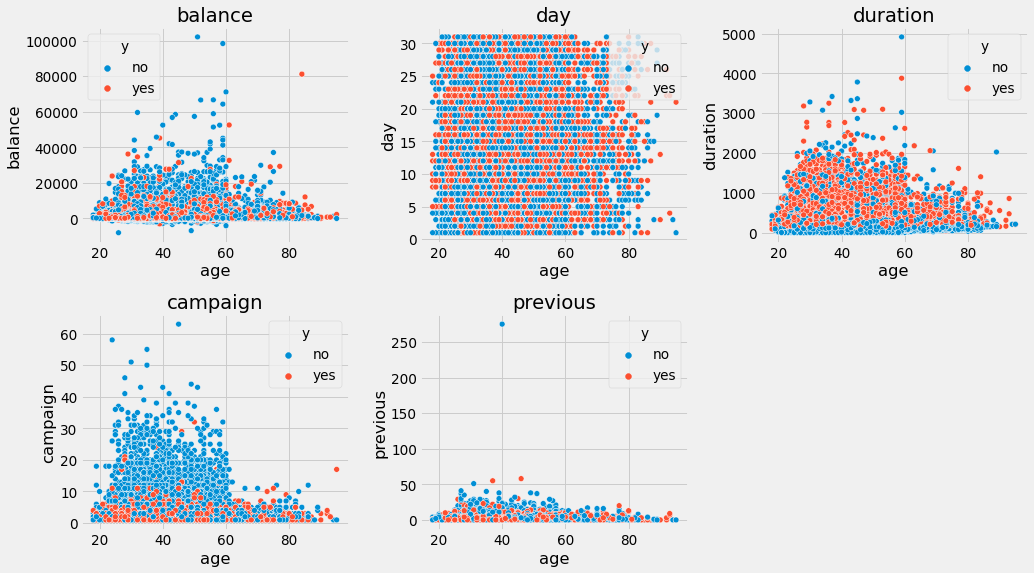

In [303]:
# Chart - 9 visualization code
abc = list(df[continuous_list].columns.values)
abc.remove('age')
n=1
fig = plt.figure(figsize=(15,12))
for i in abc:
    plt.subplot(3,3,n)
    n=n+1
    #fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=df.age, y=df[i], hue='y', data=df)
    plt.title(f'Age vs {i} with "yes" values')
    plt.title(i)
    plt.tight_layout()

**1. Why did you pick the specific chart?**

We used scatter plots to see the patterns of various continuous features with respect to age and we are identifying the conditions on which conversion of a customer depends.

**2. What is/are the insight(s) found from the chart?**

* The customers who spent less than 200 seconds on the phone call are not interested for the term deposit.
* Those who are earning less than 10,000 are mostly going for term diposit.
* We can see a very unusuall pattern that when a customer who is contacted large number of times are not converting.

#### Chart - 10

Text(0.5, 1.0, 'Balance vs Duration with "yes" values')

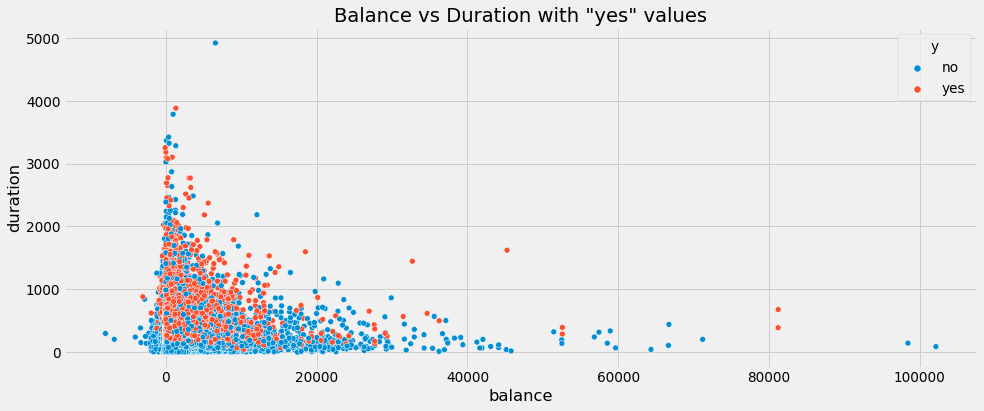

In [304]:
# Chart - 10 visualization code
sns.scatterplot(x=df.balance, y=df.duration, hue='y', data=df)
plt.title(f'Balance vs Duration with "yes" values')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [305]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

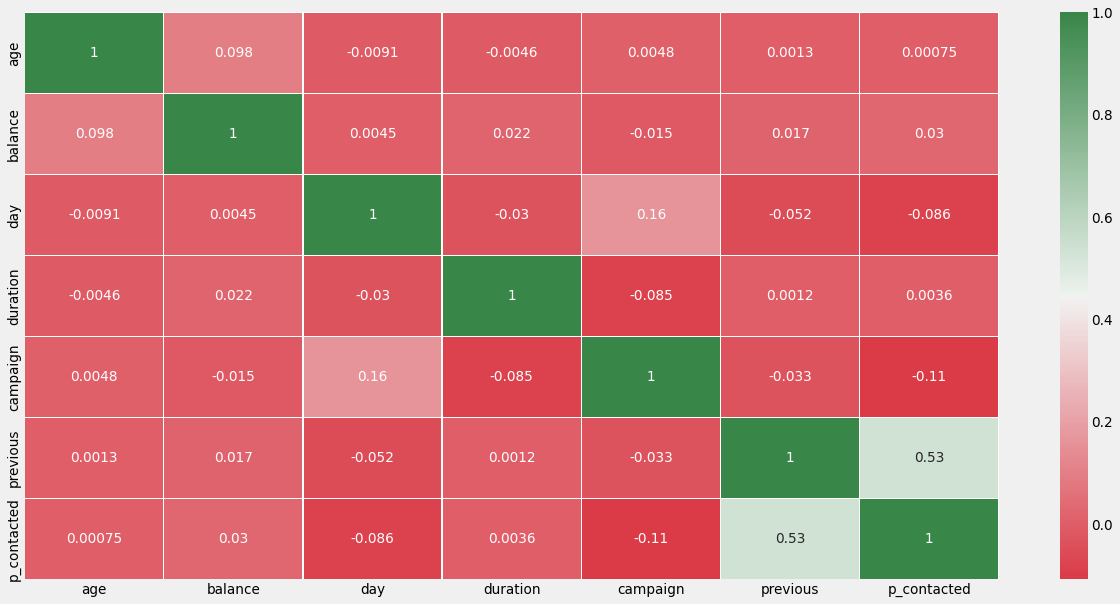

In [308]:
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

**1. Why did you pick the specific chart?**



This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset

**2. What is/are the insight(s) found from the chart?**

It is clear that all other variables are not that correlated, with the exception of previous and p contacted, which have a 0.53 correlation i.i moderately correlated

#### Chart - 15 - Pair Plot 

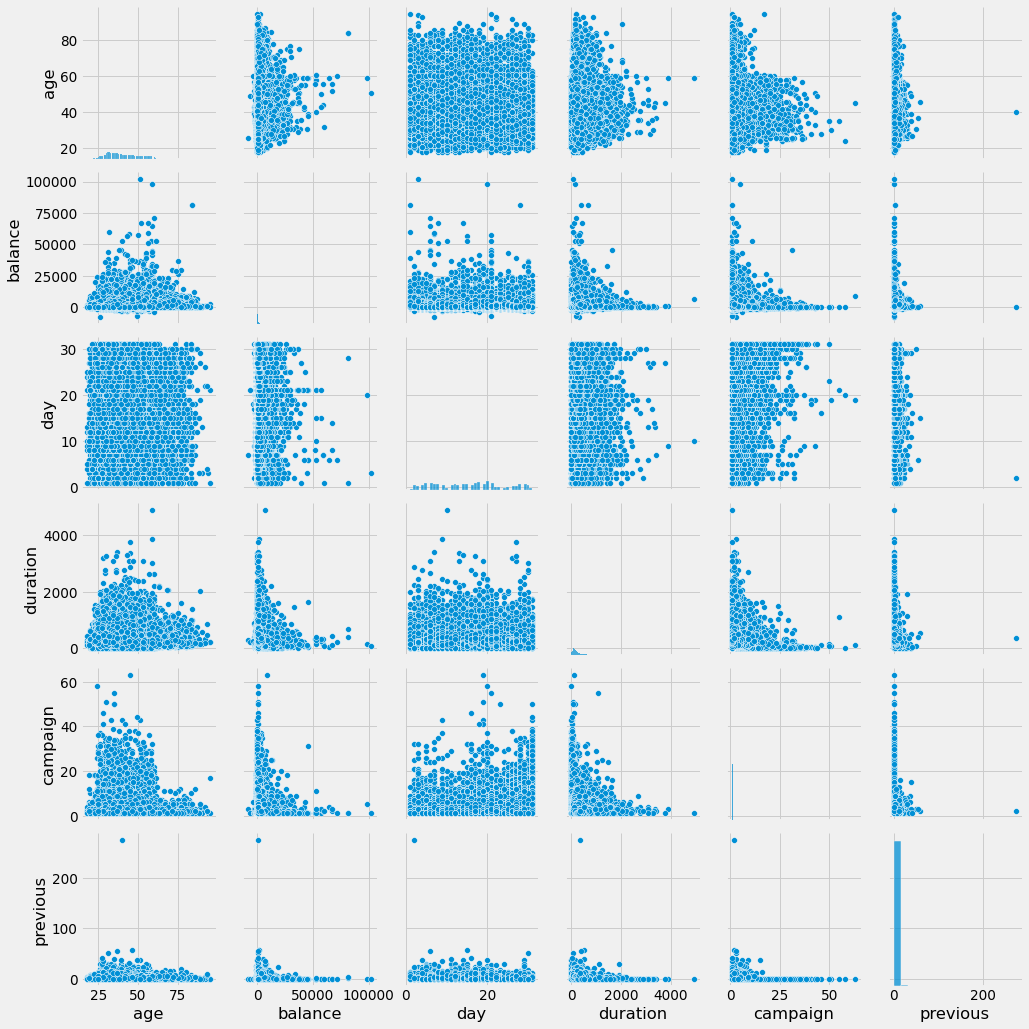

In [309]:
# Pair Plot visualization code
sns.pairplot(df[continuous_list], palette="husl")


**1. Why did you pick the specific chart?**

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis

**2. What is/are the insight(s) found from the chart?**




Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

* **Null Hypothesis H0** : The customers with balamce more than 10,000 requires less than 500 seconds to get convinced for term diposit.
* **Alternative Hypothesis H1** : The customers with balance less than 10,000 requires less than 500 seconds to get convinced for term diposit.

#### 2. Perform an appropriate statistical test.

In [310]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [311]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [312]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [313]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [314]:
# Handling Outliers & Outlier treatments
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign  previous
0      1.606965  0.256419  0.011016  0.569351  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.251940
...         ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.251940
45210  0.370689  0.528364  0.399328  0.246560  4.523577

[45211 rows x 5 columns]


(41794, 17)

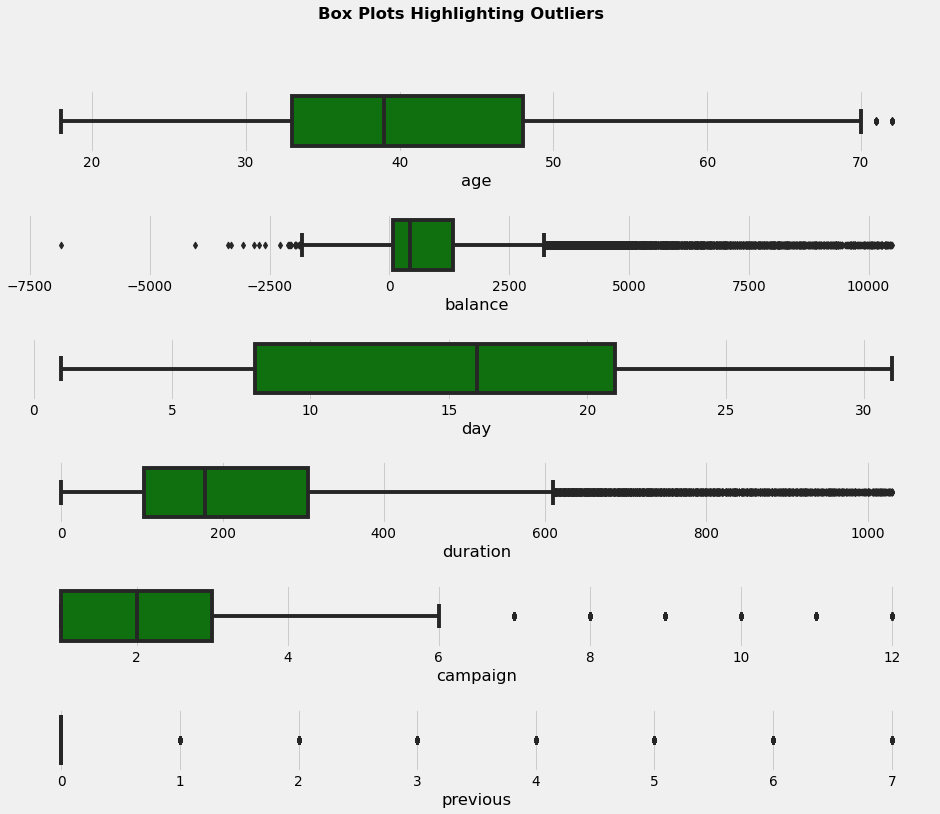

In [315]:
nrows = len(continuous_list)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(continuous_list):
    sns.boxplot(df[var], orient='h', ax=axes[i],color= 'g')

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [316]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [317]:
# Expand Contraction

#### 2. Lower Casing

In [318]:
# Lower Casing

#### 3. Removing Punctuations

In [319]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [320]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [321]:
# Remove Stopwords

In [322]:
# Remove White spaces

#### 6. Rephrase Text

In [323]:
# Rephrase Text

#### 7. Tokenization

In [324]:
# Tokenization

#### 8. Text Normalization

In [325]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [326]:
# POS Taging

#### 10. Text Vectorization

In [327]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [328]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [329]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [330]:
# Transform Your data

### 6. Data Scaling

In [331]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [332]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [333]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [334]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [335]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [336]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [337]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [338]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [339]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [340]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [341]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [342]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [343]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [344]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***